# ПЕРВАЯ ЧАСТЬ

# Исследование надежности заемщиков

Это первая часть проекта, она будет проверена автоматически. Вторую часть проверит ревьюер. 

## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [1]:
import pandas as pd
try:
    data = pd.read_csv(r'datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [2]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [4]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [5]:
for it in data['income_type'].unique():
    data.loc[(data['income_type'] == it) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == it), 'total_income'].median()
data['total_income'].isna().sum()

0

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. Таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [6]:
data['days_employed'] = abs(data['days_employed'])

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [7]:
data.groupby('income_type')['days_employed'].median()

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [8]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5], dtype=int64)

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [9]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [10]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5], dtype=int64)

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждому типу занятости `income_type`.**

In [11]:
for it in data['income_type'].unique():
    data.loc[(data['income_type'] == it) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == it), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [12]:

data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [13]:
data['total_income'] = data['total_income'].astype('int')

### Обработка дубликатов

**Задание 14. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [14]:
data['education'] = data['education'].str.lower()

**Задание 15. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру.**

In [15]:
data.duplicated().sum()

71

In [16]:
data = data.drop_duplicates()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [17]:
def categorize_income(total_income):
    if  0 <= total_income <= 30_000:
        return 'E'
    elif 30_001 <= total_income <= 50_000:
        return 'D'
    elif 50_001 <= total_income <= 200_000:
        return 'C'
    elif 200_001 <= total_income <= 1_000_000:
        return 'B'
    elif 1_000_001 <= total_income:
        return 'A'
    else:
        return 'not categori'

In [18]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [19]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [20]:
def categorize_purpose(purpose):
    if 'свадьб' in purpose:
        return 'проведение свадьбы'
    elif 'автомоб' in purpose:
        return 'операции с автомобилем'
    elif 'образов' in purpose:
        return 'получение образования'
    elif 'жиль' in purpose or 'недвижим' in purpose:
        return 'операции с недвижимостью'
    else:
        return 'not categori'

In [21]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

# ВТОРАЯ ЧАСТЬ

## Исследование данных и  интерпретация результатов

Все вопросы в данном шаге требуют от нас группировать по одному критерию и определять, влияет ли этот критерий на возврат кредита в срок или есть просрочка. Реализуем это следующим образом с помощью сводных таблиц. Разделим наших заемщиков по критерию на группы. Посмотрим, сколько всего былы выдано кредитов по каждой группе, а так же количество просрочек по кредитам. Так как абсолютные значения очень разняться, то правильнее будет смотреть на процентные отношения просрочек по кредитам к общему числу выданных кредитов.
Одно и то же действие повторяется, поэтуму реализуем фунцию.

In [22]:
def return_pivot(data, groupby, name_group='Группировка', byby='Процент просрочек'):
    data_pivot = data.pivot_table(index=groupby, values='debt', 
                              aggfunc=['count', 'sum', lambda x: round(100 * x.sum() / x.count(), 2)])
    data_pivot = data_pivot.reset_index()
    data_pivot.columns = [name_group, 'Выдано кредитов', 'Количество просрочек', 'Процент просрочек']
    data_pivot = data_pivot.sort_values(by=byby).reset_index(drop=True)
    return data_pivot

Для наглядности придадиим цифрам объема и цвета.

In [23]:
import seaborn

### Задание 19. Есть ли зависимость между количеством детей и возвратом кредита в срок?

In [24]:
data_pivot = return_pivot(data, groupby='children', name_group='Количество детей', byby='Количество детей')
data_pivot

,Количество детей,Выдано кредитов,Количество просрочек,Процент просрочек
0,0,14091,1063,7.54
1,1,4808,444,9.23
2,2,2052,194,9.45
3,3,330,27,8.18
4,4,41,4,9.76
5,5,9,0,0.00


Для наглядности придадиим цифрам объема и цвета.

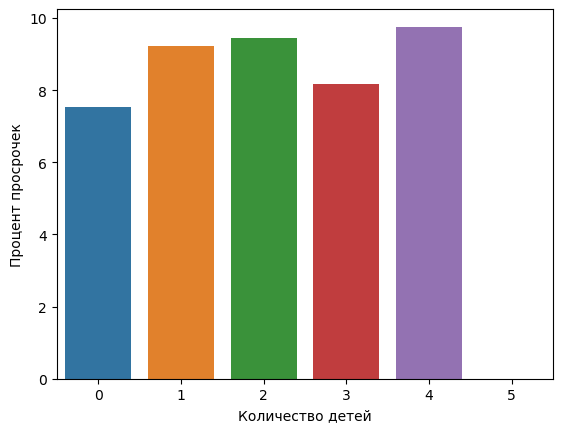

In [25]:
seaborn.barplot(x=data_pivot['Количество детей'], y=data_pivot['Процент просрочек']);

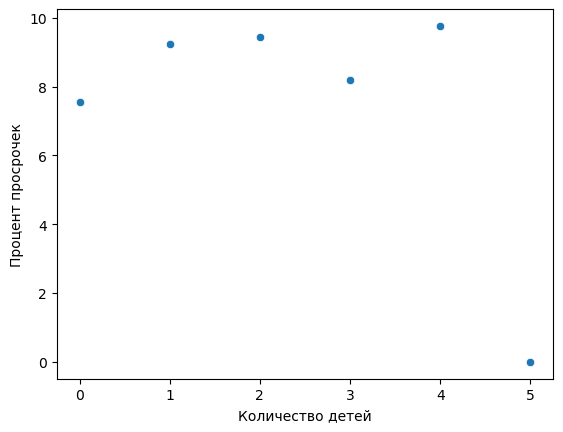

In [26]:
seaborn.scatterplot(x=data_pivot['Количество детей'], y=data_pivot['Процент просрочек']);

Согласно приведенных выше таблицы и столбчатой диаграмме можно заметить, что в группе с 5 детьми отсутствуют просроченные кредиты. Скорее всего эта аномалия, связанная с малой мощностью выборки в этой группе (всего 9 человек) по сравнению с остальными группами, поэтому при формировании вывода данную группу учитывть не будем.

В основном, наблюдается рост просрочек по кредитам от 7,54% у бездетных до 9,76% у семей с 4 детьми. Данная картина хорошо проссматривается на диаграмме рассеивания и соответствует положительной корреляции между количеством детей и вероятностью иметь просрочку по кредиту.

Хотя у семей с 3 детьми процент просроченных кредитов выбивается из общей картины. Что это? Материнский капитал или детей в этих семьях заставляют работать? 

Можно сделать вывод, что с увеличением количества детей в семье, вероятность иметь задолженность по кредиту возрастает.

### Задание 20. Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [27]:
data_pivot = return_pivot(data, groupby='family_status', name_group='Семейное положение')
data_pivot

,Семейное положение,Выдано кредитов,Количество просрочек,Процент просрочек
0,вдовец / вдова,951,63,6.62
1,в разводе,1189,84,7.06
2,женат / замужем,12261,927,7.56
3,гражданский брак,4134,385,9.31
4,Не женат / не замужем,2796,273,9.76


Для наглядности придадиим цифрам объема и цвета.

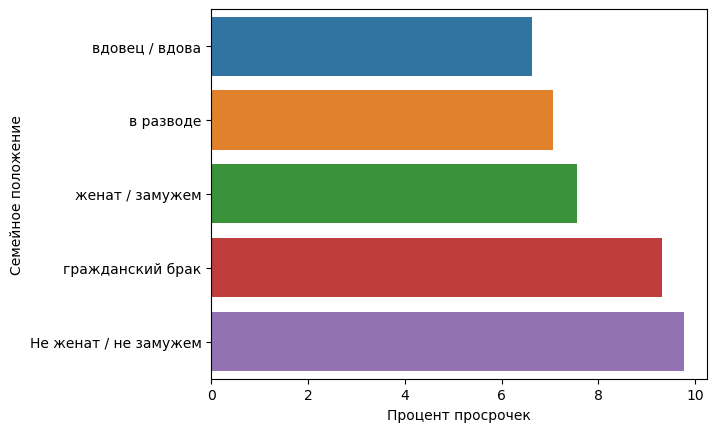

In [28]:
seaborn.barplot(y=data_pivot['Семейное положение'], x=data_pivot['Процент просрочек']);

Удивительно, что категория людей 'вдовец / вдова' текущей выборки более благонадежны, чем люди из категории 'Не женат / не замужем' никогда не состаявшие в отношениях. Возможно, в данном случае играет роль еще какой-либо фактор, например возраст?

Семейное положение нельзя оставлять без внимания и обязательно учитывать при выдаче кредита.

Лучшая категория заемщиков: люди, ранее состоявшие в официальных отношениях. А с заемщиками, никогда не состаявшими в отношениях, нужно быть аккуратно.

### Задание 21. Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

Ранее мы разделили людей по уровням дохода, вот эти категории:
- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.

Так же построим по этим категорям таблицу с процентом просрочек.

In [29]:
data_pivot = return_pivot(data, groupby='total_income_category', name_group='Уровень дохода')
data_pivot

,Уровень дохода,Выдано кредитов,Количество просрочек,Процент просрочек
0,D,349,21,6.02
1,B,5014,354,7.06
2,A,25,2,8.00
3,C,15921,1353,8.50
4,E,22,2,9.09


В категориях `0–30000 — 'E'`, `30001–50000 — 'D'` и `1000001 и выше — 'A'` наблюдается малая мощность выбокри 22, 349 и 25 соответствено, что не позволяет нам сравнивать их с группами, где мощность выборки 5014 для `200001–1000000 — 'B'` и 15921 для `50001–200000 — 'C'`
Поэтому сравним только две категории.

In [30]:
data_pivot = data_pivot[data_pivot['Выдано кредитов'] > 1000]
data_pivot

,Уровень дохода,Выдано кредитов,Количество просрочек,Процент просрочек
1,B,5014,354,7.06
3,C,15921,1353,8.50


Сухие цифры, конечно, важны. Но где же приятное для глаз?

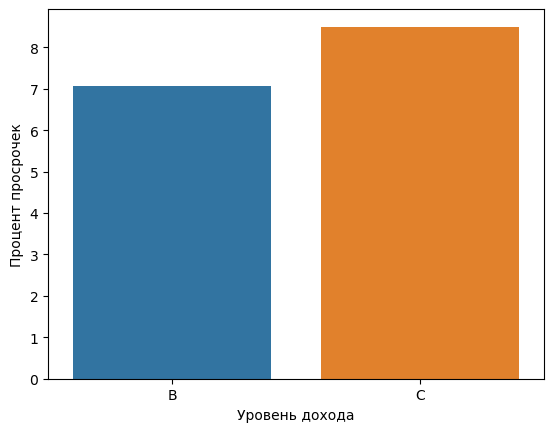

In [31]:
seaborn.barplot(x=data_pivot['Уровень дохода'], y=data_pivot['Процент просрочек']);

Не все группы смогли попасть в текущее исследование, но для двух групп наблюдается следующая зависимость:
заемщики с доходами `200001–1000000` самые ответственные и чаще вовремя платят по своим обязательствам, чего не скажешь о заемщиках с уровнем заработной платы `50001–200000`. Возможно, если разделить уровень зароботной платы по другим обоснованным критериям, получится более понятная картина о том, как взаимодействуют между собой уровень заработной платы и возврат кредита в срок.

### Задание 22. Как разные цели кредита влияют на его возврат в срок?

Ранее мы уже разбили нашу выборку на следующие категории по целям кредитования:
- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

In [32]:
data_pivot = return_pivot(data, groupby='purpose_category', name_group='Цель')
data_pivot

,Цель,Выдано кредитов,Количество просрочек,Процент просрочек
0,операции с недвижимостью,10751,780,7.26
1,проведение свадьбы,2313,183,7.91
2,получение образования,3988,369,9.25
3,операции с автомобилем,4279,400,9.35


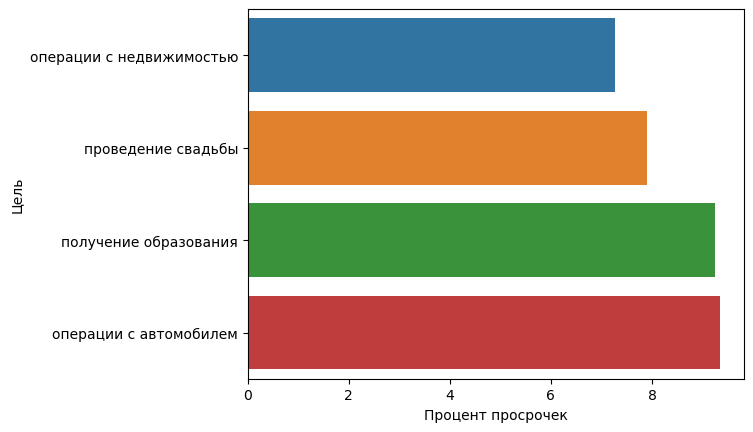

In [33]:
seaborn.barplot(y=data_pivot['Цель'], x=data_pivot['Процент просрочек']);

Аюсолютно не удивительно, что граждане, приобретающие недвижимость в кредит, стараются избегать просрочек по этому кредиту. Ведь в случе не исполнения своих обезательств эта недвижимость может быть изъята. Выдать кредит на опреции с автомобилем и на получения образования для банка является менее приоритетными, так как вероятность просрочки кредита по этим целям заема самая высокая в текущей выборке.

### Задание 23. Приведите возможные причины появления пропусков в исходных данных.

Технологические ошибки
- Сбой при выгрузке данных (копировании, создании, считывании)
- Изменение формата

Человеческий фактор
- Умышленное сокрытие
- Ошибки при заполнении
- Закон о защите персональных данных

### Задание 24. Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

Для любой выборки ее мощность играет важное значение.
Удаление пропусков может отрицательно сказаться на результате, поэтому очень важно сохранить мощность выборки.
Остается вопрос: чем заполнить пропуски.

Для количественных переменных пропуски лучше заполнять медианным значением этой переменной (как в общем случае, так и в случае с разбивкой по группам - что даст более точные медианные значения для пропусков).

Почему именно медианна?
- Минимальное и максимальное значение абсолютно точно сместит результат нашего исследования.
- Среднее значение очень сильно подверженно влиянию выбросов и шумов.

**Медиана является более устойчивым показателем к выбросам в данных.**
Кроме того, если количество значений велико и распредиление значений близко к нормальному, то медиана будет равняться среднему значению.

# Общий вывод

Проанализировав статистику о платёжеспособности клиентов, предоставленную Заказчиком - Банком были обнаружены следующие ошибки в данных:
- Пропуски значений в стобцах с ежемесячным доходом и общим трудовым стажем. Пропуски были заполнены медианными значениями в зависмиости от типа занятости.
- Отрицательные аномальные значения в трудовом стаже были заменены на положительные. Данные с аномальными значения количества детей в семье были удалены из исследовния.
- Неявные дубликаты были приведены к явным в нижнем регистре и удалены из исследования.
Данные были присвоены дополнительные категории уровня ежемесячного дохода, а так же отдельно по целям кредита для дальнейшего удобсства исследования.

В результате проведенного исследования получены следующие портреты заемщиков:
- **Идеальный заемщик**: уровеь дохода `200001–1000000`, бездетный, ранее состоявший в официальных отношениях, с целью кредита на операции с недвижимостью.
- **Проблемный заемщик**: уровеь дохода `50001–200000`, многодетный, не состоящий в каких-либо отношениях, с целью кредита на автомобиль или обучение.